In [32]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches
import os

In [40]:
# read csv file in youtube_data folder and count
# number of rows it contains
def get_csv_row_count(path):
    row_count = {}
    for file in os.listdir(path):
        if (file.endswith('.csv')):
            file_path = os.path.join(path, file)
            df = pd.read_csv(file_path)
            row_count[file] = len(df)
    return row_count

In [52]:
def process_same_brands(row_count):
    brand_name_mapping = {
        'ae_youtube_data.csv': 'american_eagle_youtube_data.csv',
        'american_eagle_youtube_data.csv': 'american_eagle_youtube_data.csv',
        'brandy_youtube_data.csv': 'brandy_melville_youtube_data.csv',
        'brandy_melville_youtube_data.csv': 'brandy_melville_youtube_data.csv',
        'north_face_youtube_data.csv': 'the_north_face_youtube_data.csv',
        'the_north_face_youtube_data.csv': 'the_north_face_youtube_data.csv',
        'alo_youtube_data.csv': 'alo_yoga_youtube_data.csv',
        'alo_yoga_youtube_data.csv': 'alo_yoga_youtube_data.csv',
        'abercrombie_youtube_data.csv': 'abercrombie_and_fitch_youtube_data.csv',
        'abercrombie_and_fitch_youtube_data.csv': 'abercrombie_and_fitch_youtube_data.csv'
    }
    # new dict to store the combined counts
    combined_row_counts = {}
    
    for name, count in row_count.items():
        standard_name = brand_name_mapping.get(name.lower().replace(' ', '_'), name.lower().replace(' ', '_'))
        if standard_name in combined_row_counts:
            combined_row_counts[standard_name] += count
        else:
            combined_row_counts[standard_name] = count
    return combined_row_counts

In [75]:
# plot histogram w/matplotlib
def plot_hist(row_count):
    # sort by count in descending order
    sorted_items = sorted(row_count.items(), key=lambda x: x[1], reverse=True)
    
    brand_names = []
    counts = []
    color_map = []
    for name, count in sorted_items:
        # extracts brand name
        processed_name = name.split('_youtube_data')[0]
        # replaces _ with space and capitalizes
        processed_name = processed_name.replace('_', ' ').title() 
        
        brand_names.append(processed_name)
        counts.append(count)
        
        # bars are diff colors based on number of rows
        if count <= 50:
            color_map.append('darkseagreen')
        elif count <= 100:
            color_map.append('cadetblue')  
        elif count <= 150:
            color_map.append('mediumseagreen')
        else:
            color_map.append('darkslategray')
    
    legend_handles = [
        mpatches.Patch(color='darkseagreen', label='0-50 rows'),
        mpatches.Patch(color='cadetblue', label='51-100 rows'),
        mpatches.Patch(color='mediumseagreen', label='101-150 rows'),
        mpatches.Patch(color='darkslategray', label='151+ rows')
    ]

    _ = plt.figure(figsize=(10,6))
    _ = plt.bar(brand_names, counts, color="red")
    # _ = plt.bar(brand_names, counts, color=color_map)
    _ = plt.xlabel('Brand Names')
    _ = plt.ylabel('Number of Rows')
    _ = plt.title('Number of Rows in YouTube Data Files')
    _ = plt.xticks(rotation=45, ha='right')
    # _ = plt.legend(handles=legend_handles, title="Row Count Colors")
    _ = plt.tight_layout()

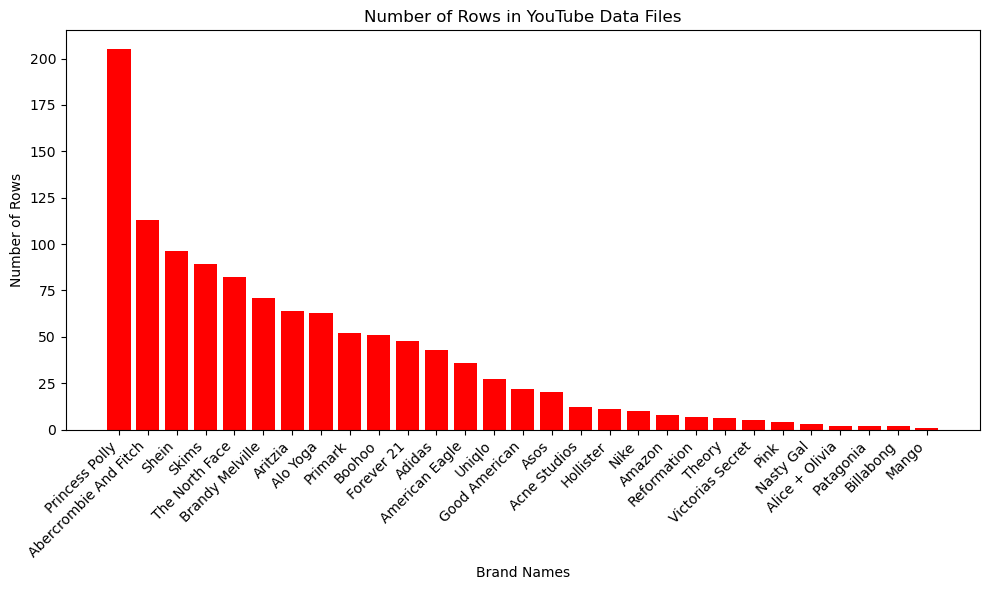

In [76]:
if __name__ == "__main__":
    path = f"../data/youtube_data"
    row_count = get_csv_row_count(path)
    # print(row_count)
    combined_row_counts = process_same_brands(row_count)
    plot_hist(combined_row_counts)

In [ ]:
filename = f"../data/youtube_data/{name}.csv"